In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
# sns.set(style = "whitegrid",color_codes = True)
# np.random.seed(sum(map(ord,"axis_grids")))
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


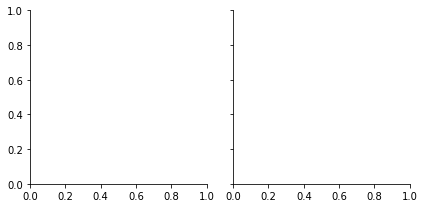

In [3]:
g = sns.FacetGrid(tips,col = "time")    # baseline

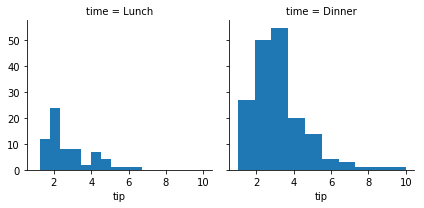

In [4]:
g = sns.FacetGrid(tips,col = "time")
g.map(plt.hist,"tip");

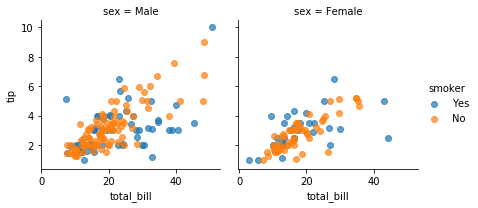

In [5]:
g = sns.FacetGrid(tips,col = "sex",hue= "smoker")
g.map(plt.scatter,"total_bill","tip",alpha=.7)
g.add_legend();  # 展示一下smoker

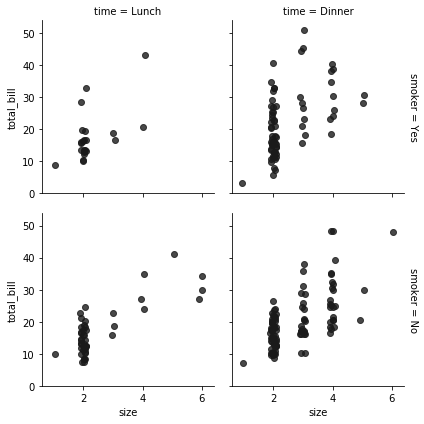

In [6]:
g = sns.FacetGrid(tips,col = "time",row= "smoker",margin_titles = True)
g.map(sns.regplot,"size","total_bill",color = ".1",fit_reg = False,x_jitter = .1 );

G:\tools\Anaconda\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
G:\tools\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


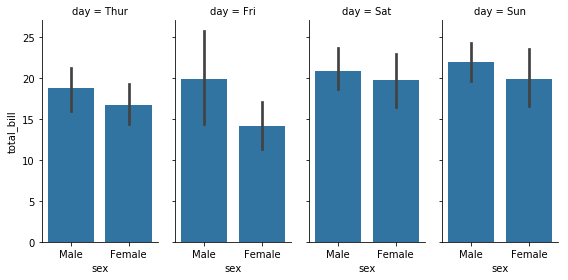

In [7]:
g = sns.FacetGrid(tips,col = "day",height = 4,aspect=.5);
g.map(sns.barplot,"sex","total_bill");

[Thur, Fri, Sat, Sun]
Categories (4, object): [Fri, Sat, Sun, Thur]


G:\tools\Anaconda\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


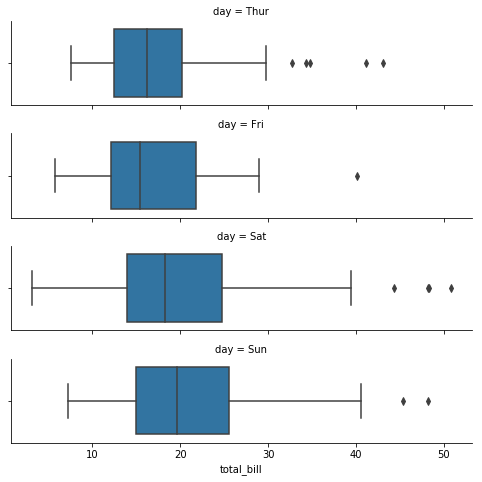

In [8]:
from pandas import Categorical
ordered_days = tips.day.value_counts().index
ordered_days = Categorical(['Thur', 'Fri', 'Sat', 'Sun'])  # 设置画图顺序
print(ordered_days)
g= sns.FacetGrid(tips,row="day",row_order = ordered_days,height = 1.7,aspect=4);
g.map(sns.boxplot,"total_bill");

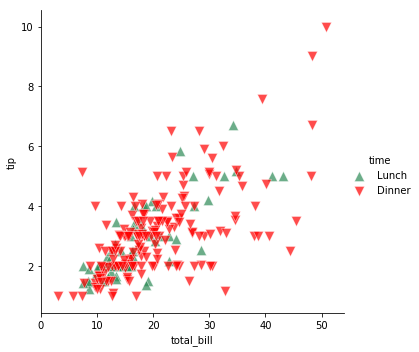

In [9]:
pal = dict(Lunch=  "seagreen",Dinner = "red")       # 调色板
g= sns.FacetGrid(tips,hue = "time",palette = pal,height = 5,
                 hue_kws = {"marker":["^","v"]})     # marker
g.map(plt.scatter,"total_bill","tip",s= 100,alpha = .7,linewidth = .5,edgecolor ="white")
g.add_legend();

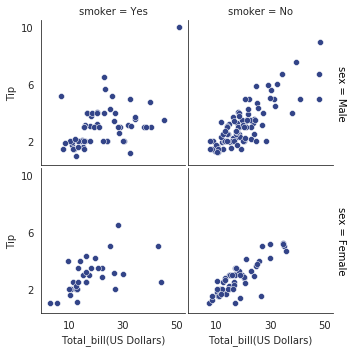

In [10]:
with sns.axes_style("white"):
    g = sns.FacetGrid(tips,row = "sex",col = "smoker",margin_titles =True,height = 2.5)
g.map(plt.scatter,"total_bill","tip",color = "#334488",edgecolor = "white",lw = .5)
g.set_axis_labels ("Total_bill(US Dollars)","Tip");
g.set(xticks = [10,30,50],yticks = [2,6,10]);
g.fig.subplots_adjust(wspace = .02,hspace= .02);  # 子图距离

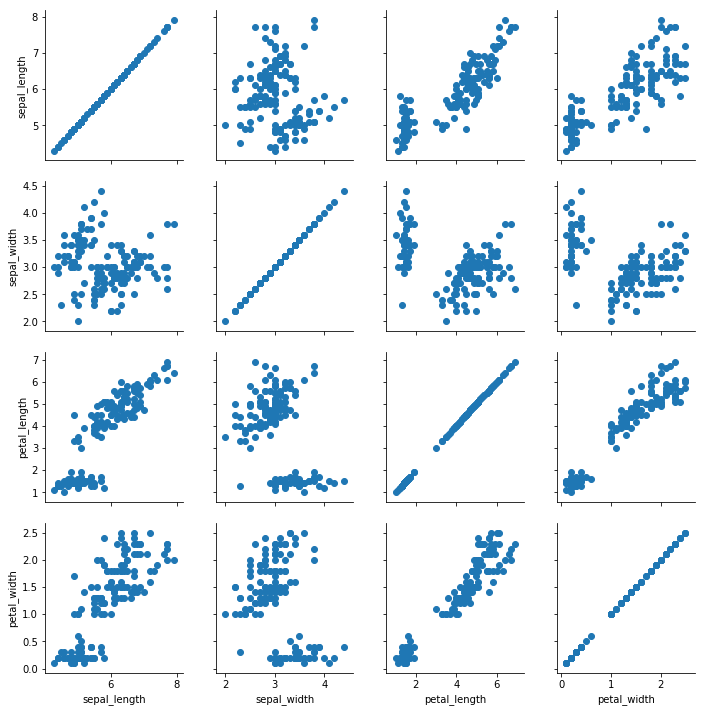

In [11]:
iris =sns.load_dataset("iris")
g= sns.PairGrid(iris)
g.map(plt.scatter)

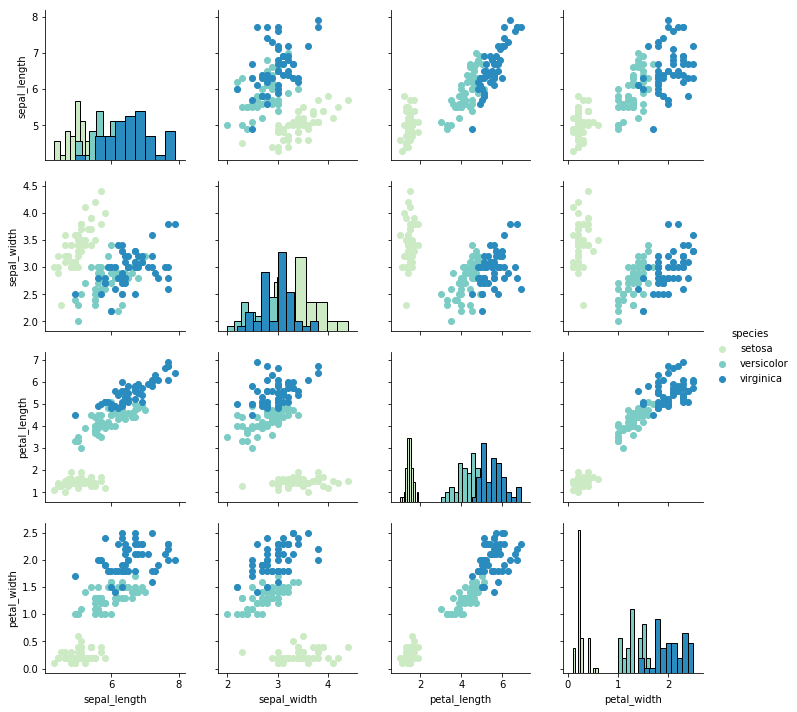

In [12]:
g= sns.PairGrid(iris,hue = "species",palette = "GnBu")
g.map_diag(plt.hist,edgecolor = "black")
g.map_offdiag(plt.scatter)     # 非对角线
g.add_legend()

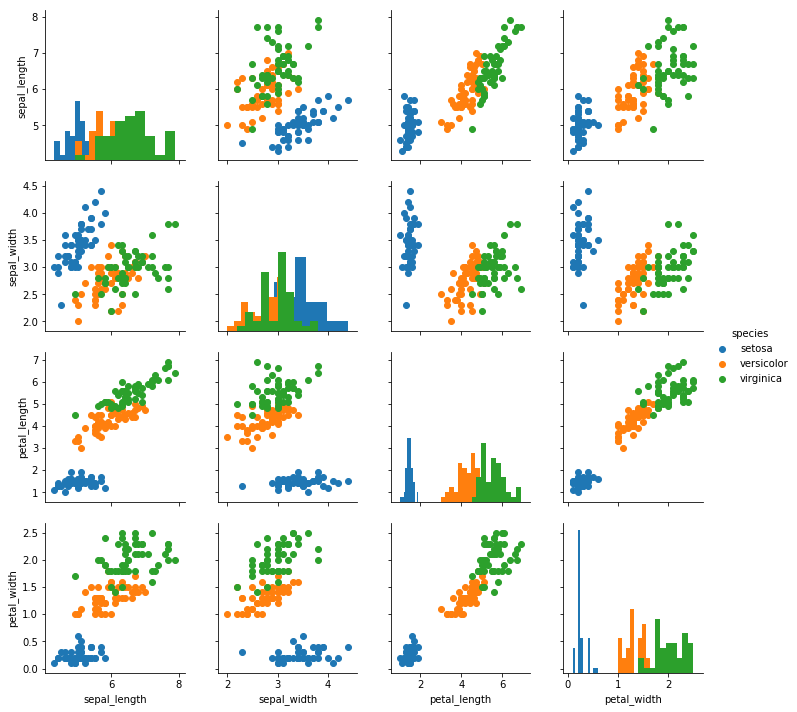

In [13]:
g= sns.PairGrid(iris,hue = "species")
g.map_diag(plt.hist);
g.map_offdiag(plt.scatter);
g.add_legend();

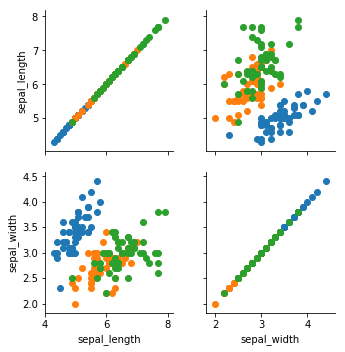

In [14]:
g= sns.PairGrid(iris,vars = ["sepal_length","sepal_width"],hue = "species")  # 取特征
g.map(plt.scatter)